# KNN Project by Christopher Meza

## Dataset and Project Explanation:

---

The dataset Vertebral contains bicomechanical features and valuess that help classify orthopaedic patients into 3 classes (normal, disk hernia or spondilolysthesis) or 2 classes (normal or abnormal).

Data Source: https://archive.ics.uci.edu/dataset/212/vertebral+column

In this project, I will be applying the K-Nearest Neighbors(KNN) algorithm on this dataset.



### Data Exploring

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [150]:
from scipy.io import arff

data_arff_2C = arff.loadarff("column_2C_weka.arff")
data_arff_3C = arff.loadarff("column_3C_weka.arff")

In [151]:
vert_arff_2C_df = pd.DataFrame(data_arff_2C[0])
# vert_arff_3C_df = pd.DataFrame(data_arff_3C[0])

In [152]:
vert_arff_2C_df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'


In [153]:
vert_arff_2C_df, vert_arff_2C_df.size
# 2C means 2 classes, Abnormal or Normal

(     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
 0           63.027817    22.552586              39.609117     40.475232   
 1           39.056951    10.060991              25.015378     28.995960   
 2           68.832021    22.218482              50.092194     46.613539   
 3           69.297008    24.652878              44.311238     44.644130   
 4           49.712859     9.652075              28.317406     40.060784   
 ..                ...          ...                    ...           ...   
 305         47.903565    13.616688              36.000000     34.286877   
 306         53.936748    20.721496              29.220534     33.215251   
 307         61.446597    22.694968              46.170347     38.751628   
 308         45.252792     8.693157              41.583126     36.559635   
 309         33.841641     5.073991              36.641233     28.767649   
 
      pelvic_radius  degree_spondylolisthesis        class  
 0        98.672917      

In [154]:
vert_arff_2C_df.corr()

<ipython-input-154-69679c426b57>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  vert_arff_2C_df.corr()


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


In [155]:
vert_arff_2C_df['class']

0      b'Abnormal'
1      b'Abnormal'
2      b'Abnormal'
3      b'Abnormal'
4      b'Abnormal'
          ...     
305      b'Normal'
306      b'Normal'
307      b'Normal'
308      b'Normal'
309      b'Normal'
Name: class, Length: 310, dtype: object

In [156]:
vert_arff_2C_df['class'].value_counts()

b'Abnormal'    210
b'Normal'      100
Name: class, dtype: int64

In [157]:
def plot_features(x, y, classes, df):

  for class_name in classes:
    subset = df[df['class'] == class_name]
    plt.scatter(subset[x],subset[y], label=class_name)

  # Customize plot
  x_feature, y_feature = x, y
  plt.title(f'{x_feature} vs. {y_feature}')
  plt.xlabel(f'{x_feature}')
  plt.ylabel(f'{y_feature}')
  plt.legend()

  plt.show()


In [158]:
classes = vert_arff_2C_df['class'].unique()
classes

array([b'Abnormal', b'Normal'], dtype=object)

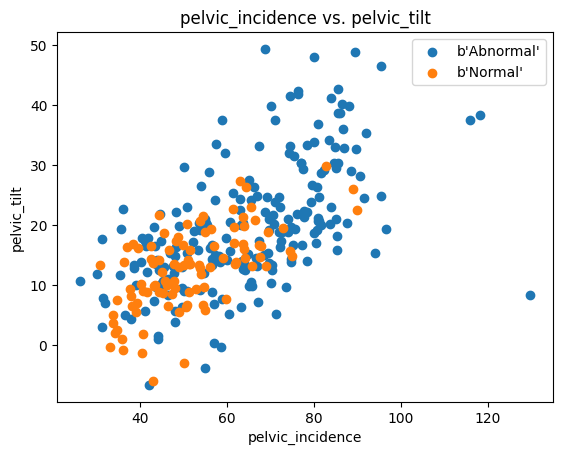

In [159]:
plot_features(x='pelvic_incidence', y='pelvic_tilt', classes=classes, df=vert_arff_2C_df)

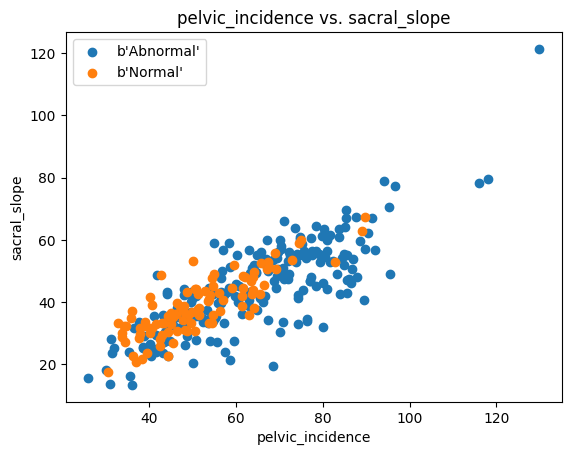

In [160]:
plot_features('pelvic_incidence', 'sacral_slope', classes, vert_arff_2C_df)

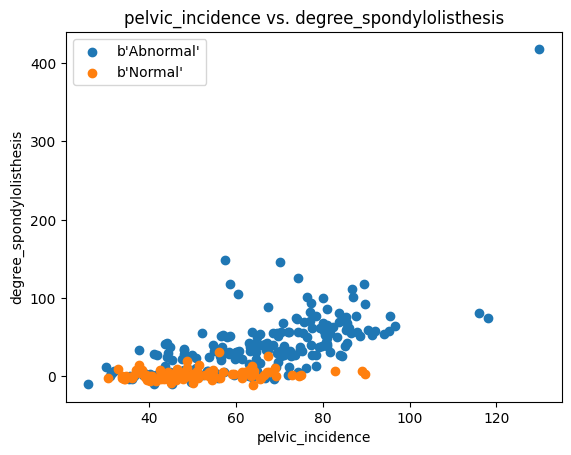

In [161]:
plot_features('pelvic_incidence', 'degree_spondylolisthesis', classes, vert_arff_2C_df)

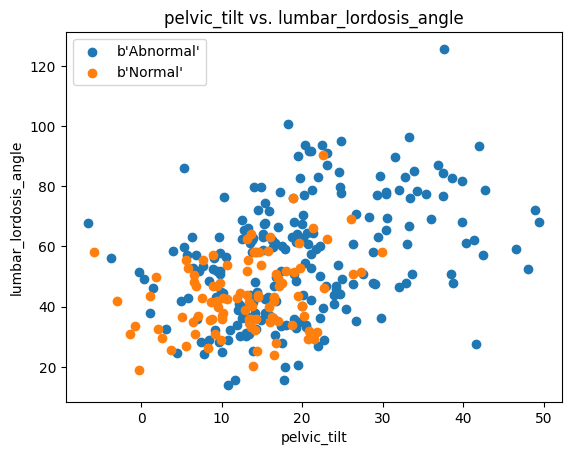

In [162]:
plot_features('pelvic_tilt', 'lumbar_lordosis_angle', classes, vert_arff_2C_df)

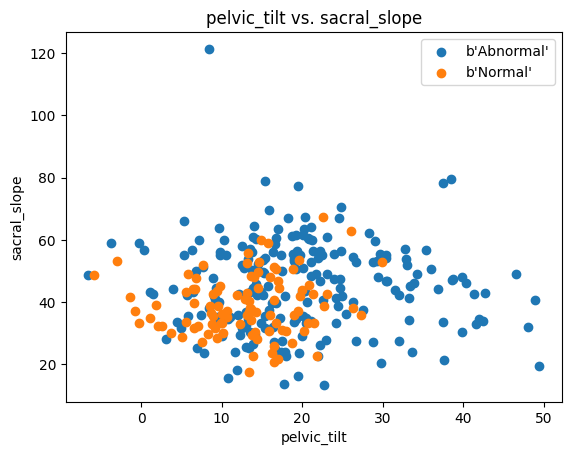

In [163]:
plot_features('pelvic_tilt', 'sacral_slope', classes, vert_arff_2C_df)

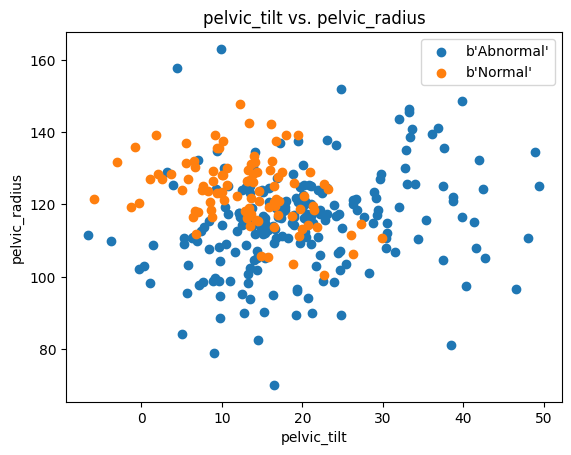

In [164]:
plot_features('pelvic_tilt', 'pelvic_radius', classes, vert_arff_2C_df)

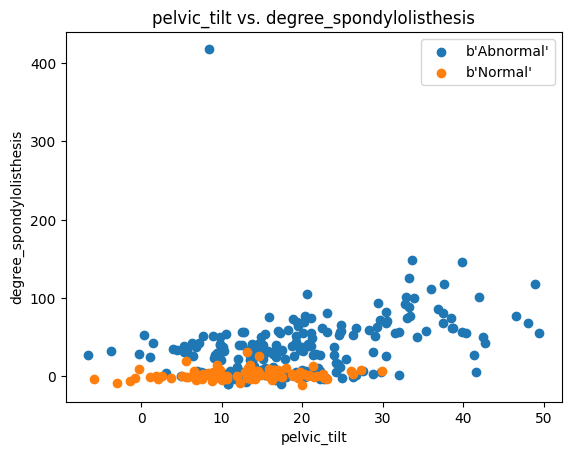

In [165]:
plot_features('pelvic_tilt', 'degree_spondylolisthesis', classes, vert_arff_2C_df)

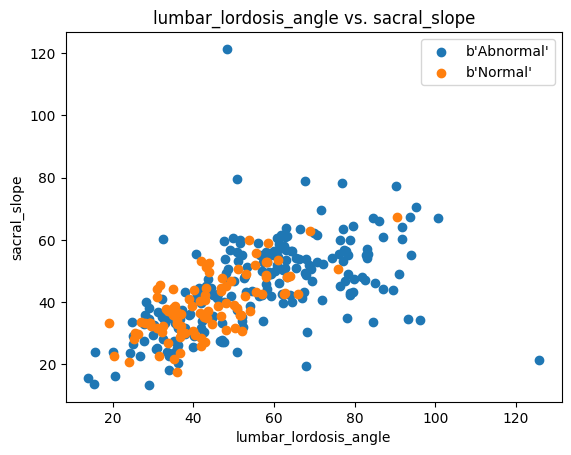

In [166]:
plot_features('lumbar_lordosis_angle', 'sacral_slope', classes, vert_arff_2C_df)

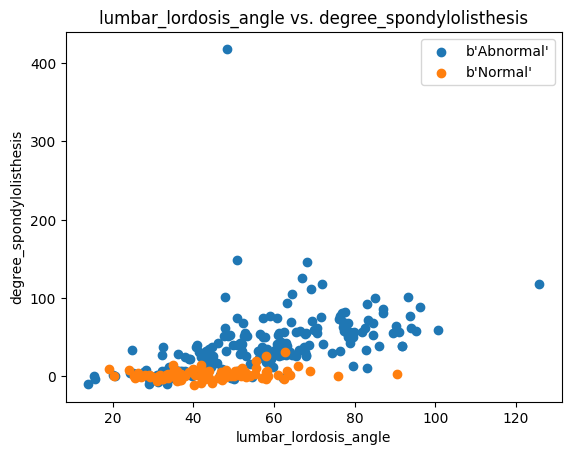

In [167]:
plot_features('lumbar_lordosis_angle', 'degree_spondylolisthesis', classes, vert_arff_2C_df)

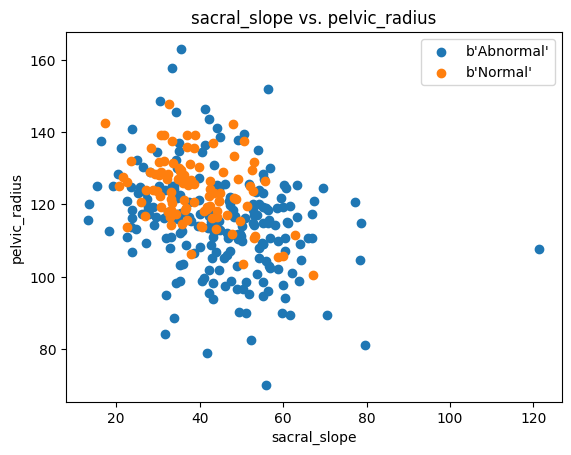

In [168]:
plot_features('sacral_slope', 'pelvic_radius', classes, vert_arff_2C_df)

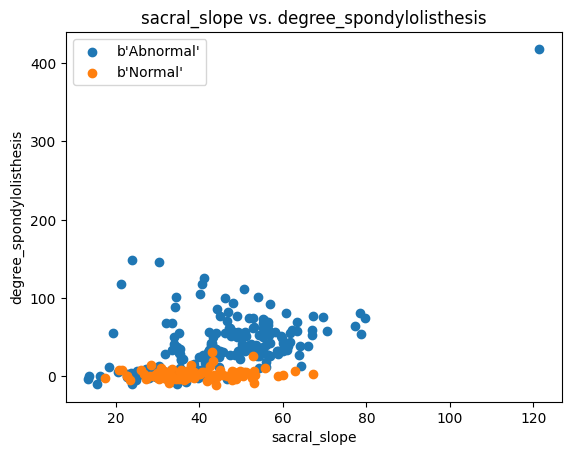

In [169]:
plot_features('sacral_slope', 'degree_spondylolisthesis', classes, vert_arff_2C_df)

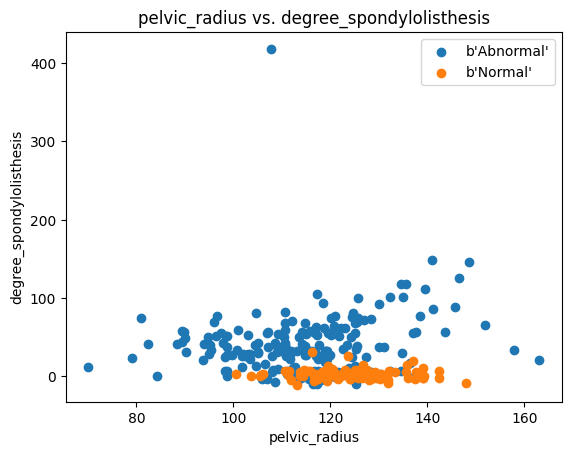

In [170]:
plot_features('pelvic_radius', 'degree_spondylolisthesis', classes, vert_arff_2C_df)

In [171]:
X = vert_arff_2C_df.iloc[:, :6].values
y = vert_arff_2C_df.iloc[:, 6:].values

In [172]:
vert_arff_2C_df['class'] = vert_arff_2C_df['class'].replace({"b'Abnormal'": 1, "b'Normal'": 0})

In [173]:
vert_arff_2C_df['class']

0      b'Abnormal'
1      b'Abnormal'
2      b'Abnormal'
3      b'Abnormal'
4      b'Abnormal'
          ...     
305      b'Normal'
306      b'Normal'
307      b'Normal'
308      b'Normal'
309      b'Normal'
Name: class, Length: 310, dtype: object

In [174]:
# Relabel the target values from b'Abnormal' = 1, b'Normal' = 0.
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

vert_arff_2C_df['class'] = label_encoder.fit_transform(vert_arff_2C_df['class'])
vert_arff_2C_df['class'] = vert_arff_2C_df['class'].replace({0: 1, 1: 0})

In [175]:
vert_arff_2C_df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


In [176]:
X_train_0 = vert_arff_2C_df[vert_arff_2C_df['class'] == 0][:70]
X_train_1 = vert_arff_2C_df[vert_arff_2C_df['class'] == 1][:140]

X_test_0 = vert_arff_2C_df[vert_arff_2C_df['class'] == 0][70:]
X_test_1 = vert_arff_2C_df[vert_arff_2C_df['class'] == 1][140:]

In [177]:
train = pd.concat([X_train_0, X_train_1], axis=0)
test = pd.concat([X_test_0, X_test_1], axis=0)

In [178]:
X_train = train.drop('class', axis=1)
y_train = train['class']

X_test = test.drop('class', axis=1)
y_test = test['class']

In [179]:
X_train, y_train

(     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
 210         38.505273    16.964297              35.112814     21.540976   
 211         54.920858    18.968430              51.601455     35.952428   
 212         44.362490     8.945435              46.902096     35.417055   
 213         48.318931    17.452121              48.000000     30.866809   
 214         45.701789    10.659859              42.577846     35.041929   
 ..                ...          ...                    ...           ...   
 135         77.121344    30.349874              77.481083     46.771470   
 136         88.024499    39.844669              81.774473     48.179830   
 137         83.396606    34.310989              78.423293     49.085617   
 138         72.054034    24.700737              79.874016     47.353297   
 139         85.095503    21.069897              91.734792     64.025606   
 
      pelvic_radius  degree_spondylolisthesis  
 210     127.632875                  7

## KNN Modeling

In [180]:
# Import KNN dependencies (Using Euclidean)
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.covariance import empirical_covariance
from sklearn.preprocessing import StandardScaler

knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [181]:
scalar = StandardScaler()
X_train_normalized = scalar.fit_transform(X_train)
X_test_normalized = scalar.transform(X_test)

# Calculate covariance matrix on the normalized training set
cov_matrix = empirical_covariance(X_train_normalized)

# Calculate the inverse covariance matrix
inv_cov_matrix = np.linalg.inv(cov_matrix)

In [182]:
knn.fit(X_train_normalized, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [183]:
y_pred = knn.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [184]:
# cm = confusion_matrix(y_test, y_pred)
# print(cm)

In [185]:
print(f1_score(y_test, y_pred))

0.8235294117647058


In [186]:
print(f'{accuracy_score(y_test, y_pred) * 100}%')

70.0%


In [187]:
def knn_classifier(n, x_train_norm, y_train, x_test_norm, y_test, dist, weights='uniform'):
  f1_score_list = []
  acc_score = []
  p = 2

  if dist == "minkowski":
    p = 1
  elif dist == "chebyshev":
    p = float('inf')

  for i in range(1, n + 1):
    knn = KNeighborsClassifier(n_neighbors=i, p=p, weights=weights, metric=dist)
    knn.fit(x_train_norm, y_train)
    y_pred = knn.predict(x_test_norm)
    f1 = f1_score(y_test, y_pred)
    acc_test = accuracy_score(y_test, y_pred)

    f1_score_list.append(f1)
    acc_score.append(acc_test)

    print(f"KNN = {i}'s - f1_score is: {f1:.4f}, acc_test_score is: {acc_test * 100:.2f}\n")

  # Plotting the performance metrics
  plt.figure(figsize=(10, 5))
  plt.plot(range(1, n + 1), f1_score_list, label='F1 Score', marker='o')
  plt.plot(range(1, n + 1), acc_score, label='Accuracy Score', marker='o')
  plt.xlabel('Number of Neighbors (K)')
  plt.ylabel('Score')
  plt.title(f'Performance of KNN Classifier - {dist.upper()} + {weights.upper()}')
  plt.xticks(range(1, n + 1))
  plt.legend()
  plt.grid(True)
  plt.show()


In [188]:
def mahalanobis_distance(x, y, cov_matrix):
    diff = x - y
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    return np.sqrt(np.dot(np.dot(diff, inv_cov_matrix), diff.T))

def knn_classifier_maha_weights(n, x_train_norm, y_train, x_test_norm, y_test, cov_matrix, weights='uniform'):
    f1_score_list = []
    acc_score = []

    for i in range(1, n + 1):
        knn = KNeighborsClassifier(n_neighbors=i, weights=weights, metric=lambda x, y: mahalanobis_distance(x, y, cov_matrix))
        knn.fit(x_train_norm, y_train)
        y_pred = knn.predict(x_test_norm)
        f1 = f1_score(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)

        f1_score_list.append(f1)
        acc_score.append(acc)

        print(f"KNN = {i}'s - f1_score is: {f1:.4f}, acc_score is: {acc * 100:.2f}\n")

    # Plotting the performance metrics
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, n + 1), f1_score_list, label='F1 Score', marker='o')
    plt.plot(range(1, n + 1), acc_score, label='Accuracy Score', marker='o')
    plt.xlabel('Number of Neighbors (K)')
    plt.ylabel('Score')
    plt.title(f'Performance of KNN Classifier - MAHALANOBIS + {weights}')
    plt.xticks(range(1, n + 1))
    plt.legend()
    plt.grid(True)
    plt.show()


KNN = 1's - f1_score is: 0.8844, acc_test_score is: 83.00

KNN = 2's - f1_score is: 0.8936, acc_test_score is: 85.00

KNN = 3's - f1_score is: 0.9054, acc_test_score is: 86.00

KNN = 4's - f1_score is: 0.9167, acc_test_score is: 88.00

KNN = 5's - f1_score is: 0.8800, acc_test_score is: 82.00

KNN = 6's - f1_score is: 0.8844, acc_test_score is: 83.00

KNN = 7's - f1_score is: 0.8859, acc_test_score is: 83.00

KNN = 8's - f1_score is: 0.8844, acc_test_score is: 83.00

KNN = 9's - f1_score is: 0.8800, acc_test_score is: 82.00

KNN = 10's - f1_score is: 0.8800, acc_test_score is: 82.00



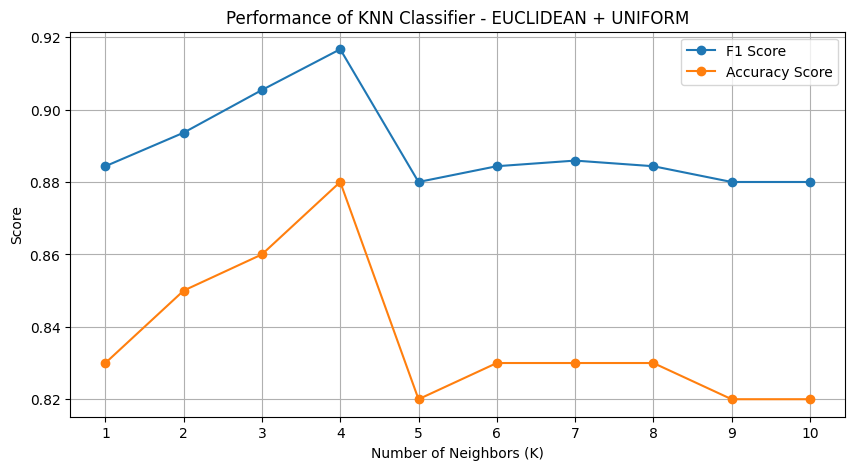

In [189]:
# Euclidean
# Add 'distance' for the weights parameter, default ='uniform'
knn_classifier(n=10, x_train_norm=X_train_normalized, y_train=y_train, x_test_norm=X_test_normalized, y_test=y_test, dist='euclidean')

KNN = 1's - f1_score is: 0.8828, acc_test_score is: 83.00

KNN = 2's - f1_score is: 0.8759, acc_test_score is: 83.00

KNN = 3's - f1_score is: 0.9041, acc_test_score is: 86.00

KNN = 4's - f1_score is: 0.9091, acc_test_score is: 87.00

KNN = 5's - f1_score is: 0.8919, acc_test_score is: 84.00

KNN = 6's - f1_score is: 0.9028, acc_test_score is: 86.00

KNN = 7's - f1_score is: 0.8800, acc_test_score is: 82.00

KNN = 8's - f1_score is: 0.8980, acc_test_score is: 85.00

KNN = 9's - f1_score is: 0.8800, acc_test_score is: 82.00

KNN = 10's - f1_score is: 0.8859, acc_test_score is: 83.00



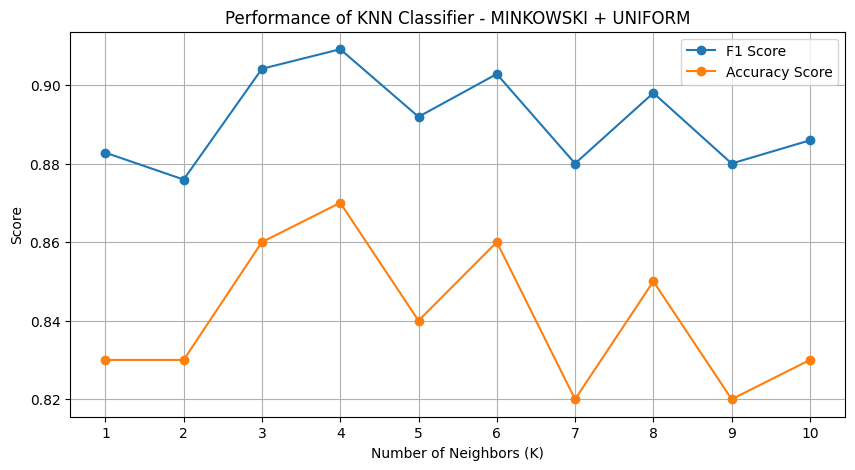

In [190]:
# Minkowski
knn_classifier(n=10, x_train_norm=X_train_normalized, y_train=y_train, x_test_norm=X_test_normalized, y_test=y_test, dist='minkowski')

KNN = 1's - f1_score is: 0.8980, acc_test_score is: 85.00

KNN = 2's - f1_score is: 0.8714, acc_test_score is: 82.00

KNN = 3's - f1_score is: 0.8919, acc_test_score is: 84.00

KNN = 4's - f1_score is: 0.9028, acc_test_score is: 86.00

KNN = 5's - f1_score is: 0.8800, acc_test_score is: 82.00

KNN = 6's - f1_score is: 0.8844, acc_test_score is: 83.00

KNN = 7's - f1_score is: 0.8725, acc_test_score is: 81.00

KNN = 8's - f1_score is: 0.8844, acc_test_score is: 83.00

KNN = 9's - f1_score is: 0.8784, acc_test_score is: 82.00

KNN = 10's - f1_score is: 0.8904, acc_test_score is: 84.00



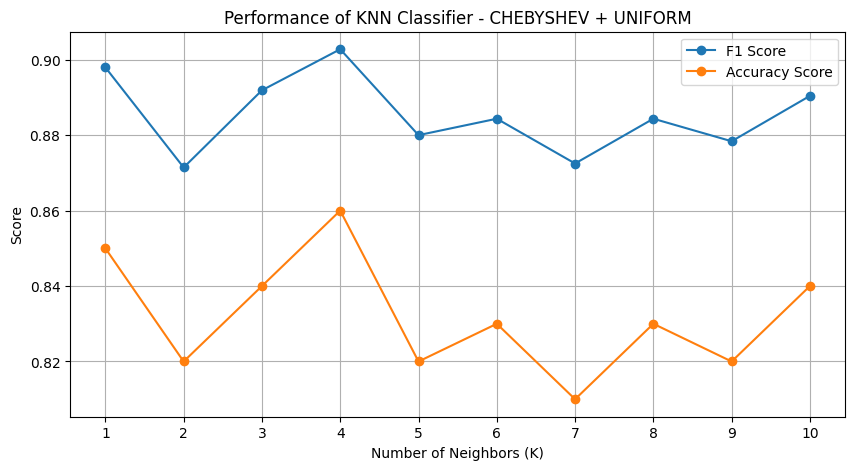

In [191]:
# Chebyshev
knn_classifier(n=10, x_train_norm=X_train_normalized, y_train=y_train, x_test_norm=X_test_normalized, y_test=y_test, dist='chebyshev')

KNN = 1's - f1_score is: 0.8919, acc_score is: 84.00

KNN = 2's - f1_score is: 0.8777, acc_score is: 83.00

KNN = 3's - f1_score is: 0.8844, acc_score is: 83.00

KNN = 4's - f1_score is: 0.9155, acc_score is: 88.00

KNN = 5's - f1_score is: 0.8980, acc_score is: 85.00

KNN = 6's - f1_score is: 0.8904, acc_score is: 84.00

KNN = 7's - f1_score is: 0.8784, acc_score is: 82.00

KNN = 8's - f1_score is: 0.8844, acc_score is: 83.00

KNN = 9's - f1_score is: 0.8800, acc_score is: 82.00

KNN = 10's - f1_score is: 0.8980, acc_score is: 85.00



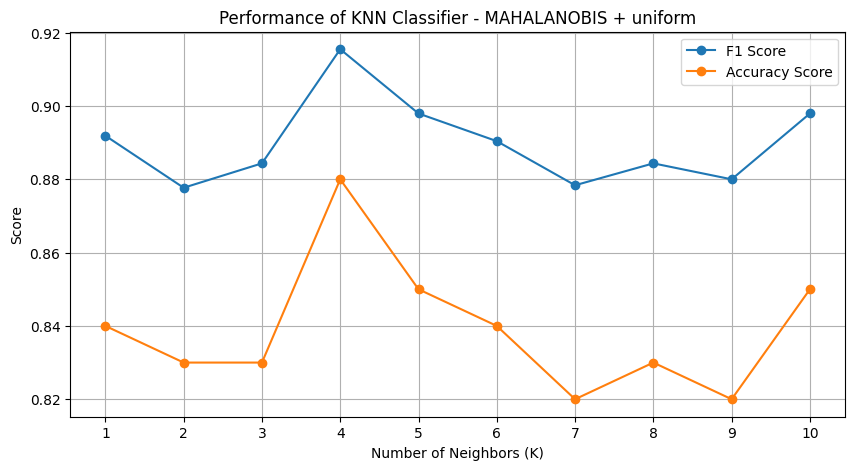

In [192]:
# Maha
knn_classifier_maha_weights(n=10, x_train_norm=X_train_normalized, y_train=y_train, x_test_norm=X_test_normalized, y_test=y_test, cov_matrix=cov_matrix)
# k=4